<a href="https://colab.research.google.com/github/j-agbaje/PCA_Assignment/blob/main/Template_PCA_Formative_1%5BJeremiah_Agbaje%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [102]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np

# Load data from CSV (skip header)
data = np.genfromtxt('/content/fuel_econ.csv', delimiter=',', skip_header=1)

# Imputation: Replace NaNs with 0
data = np.nan_to_num(data, nan=0.0)
means = np.mean(data, axis=0)
std_devs = np.std(data, axis=0)

# Avoid division by zero for columns with zero standard deviation
std_devs[std_devs == 0] = 1


standardized_data = (data - means) / std_devs # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data



[[-1.73714048  0.         -0.11140046 -1.47583548  0.          0.
   0.          0.          0.28310163  0.65053594  1.46709627 -1.21737766
  -0.85996012 -0.85242986 -1.29062982 -1.39247459 -1.00832279  1.02283829
  -0.95057953 -0.94575548]
 [-1.73668367  0.         -0.11140046 -1.47583548  0.          0.
   0.          0.         -0.78181585 -0.72799833  1.86476224 -1.21737766
   0.00642675 -0.11743408  0.18494654 -0.03920038  0.07186379 -0.29854998
   0.1886082   0.1942578 ]
 [-1.73622685  0.         -0.11140046 -1.47583548  0.          0.
   0.          0.          0.28310163  0.49736547  1.86476224 -1.21737766
  -0.69441634 -0.75324472 -0.5920197  -0.85174957 -0.68633929  0.56793413
  -0.38098566 -0.37574884]
 [-1.73577004  0.         -0.11140046 -1.47583548  0.          0.
   0.          0.          0.28310163  0.49736547  1.86476224 -1.21737766
  -0.78280029 -0.830286   -0.82738386 -1.02758796 -0.81865124  0.752062
  -0.38098566 -0.37574884]
 [-1.73531322  0.         -0.11140046 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [103]:
# Step 3: Calculate the Covariance Matrix

cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00025458,  0.        , -0.00937631,  0.98591866,  0.        ,
         0.        ,  0.        ,  0.        , -0.06011148, -0.07468488,
        -0.00657025, -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,
         0.09538375,  0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00937631,  0.        ,  1.00025458, -0.01438515,  0.        ,
         0.        ,  0.        ,  0.        , -0.03195883, -0.03490136,
        -0.0655699 , -0.02088278,  0.02840705,  0.0264358 ,  0.04120921,
         0.04286928,  0.0331644 , -0.03932048,  0.04295895,  0.04360438],
       [ 0.98591866,  0.        , -0.01438515,  1.00025458,  0.        ,
         0.        ,  0.        ,  0.        , -

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [104]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([8.95905759e+00, 2.06823618e+00, 1.59405184e+00, 1.00233008e+00,
        6.70048859e-01, 2.98080013e-01, 1.60799414e-01, 1.25143554e-01,
        6.40134411e-02, 3.23518907e-02, 1.36850804e-02, 9.24439808e-03,
        4.24567886e-03, 2.14355883e-03, 3.87172096e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([[ 1.89658210e-02, -6.87461410e-01, -7.73769649e-02,
         -1.35344259e-02, -1.88617861e-02,  1.56639861e-02,
         -7.16805873e-02,  1.13602037e-01,  3.94180045e-03,
         -1.15258290e-01, -6.95603326e-01,  6.76161128e-02,
         -2.08748410e-02,  7.07884868e-03,  5.19897476e-04,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [105]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices] # Sort eigenvectors accordingly
sorted_eigenvectors

array([[ 1.89658210e-02, -6.87461410e-01, -7.73769649e-02,
        -1.35344259e-02, -1.88617861e-02,  1.56639861e-02,
        -7.16805873e-02,  1.13602037e-01,  3.94180045e-03,
        -1.15258290e-01, -6.95603326e-01,  6.76161128e-02,
        -2.08748410e-02,  7.07884868e-03,  5.19897476e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.52380907e-02,  2.06751271e-02, -2.62459330e-02,
        -9.95583259e-01, -4.00286891e-02,  7.14173275e-02,
        -1.62178525e-02, -2.18279690e-02, -2.78004937e-03,
        -1.02798714e-03,  3.3

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [106]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = sorted_indices / np.sum(sorted_indices)

threshold = 0.80
  # Try reducing to 80% variance instead of 90%

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least 'threshold' percentage of variance
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components for {threshold * 100}% variance: {num_components}")

# Select the eigenvectors for the chosen number of components
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

reduced_data = standardized_data @ selected_eigenvectors
print(f"Reduced Data Shape: {reduced_data.shape}")

print(f"Original Data Shape: {standardized_data.shape}")
print(f"Reduced Data Shape: {reduced_data.shape}")


Number of components for 80.0% variance: 18
Reduced Data Shape: (3929, 18)
Original Data Shape: (3929, 20)
Reduced Data Shape: (3929, 18)


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [107]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 18)


array([[-3.19276580e+00,  1.98480089e+00,  1.85485622e+00,
         5.40826305e-02,  4.14605090e-01, -3.27582628e-02,
        -3.13860536e-01, -5.82404515e-01,  2.19417879e-01,
         1.22464188e-01,  1.53266296e-01,  5.94576332e-02,
         1.96200310e-03,  2.08355475e-03,  1.65385619e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.85754317e-01,  1.98710661e+00,  2.48483104e+00,
         1.13551555e-01,  7.69583601e-01,  5.97462400e-01,
         7.76778370e-02, -4.04168514e-01, -1.77815194e-02,
         2.72501455e-01,  1.52133290e-01,  1.51414688e-01,
         1.90583028e-02, -4.72614326e-03,  1.16815378e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.09294817e+00,  2.03371917e+00,  2.20996649e+00,
         8.89590124e-02,  1.71628077e-01,  4.11747409e-01,
        -2.32060451e-02, -7.88626708e-02,  1.05783185e-01,
         1.23429953e-01,  1.71554199e-01,  1.61873592e-01,
         8.53977082e-03,  3.35843389e-02, -5.74148265e

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

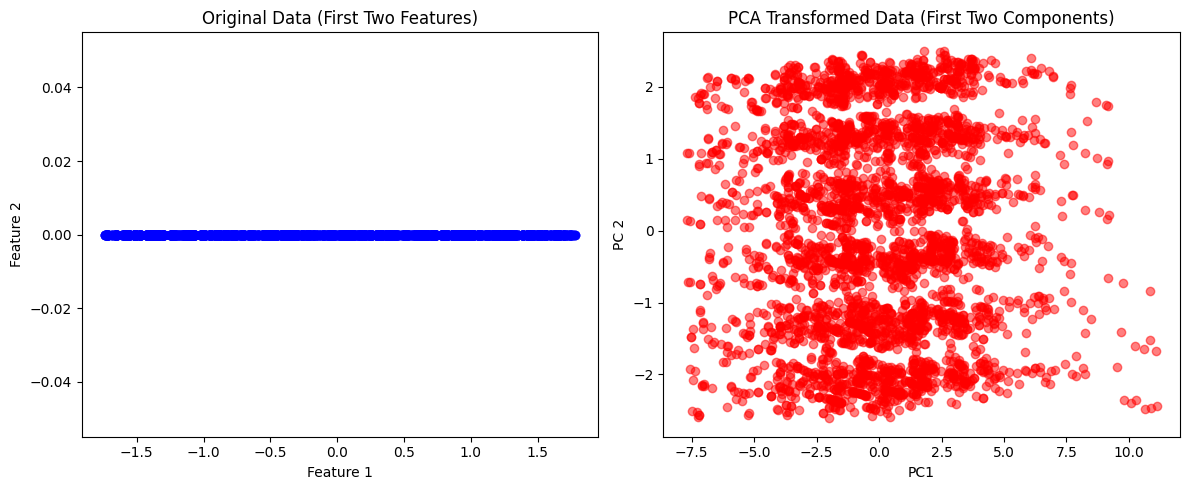

In [108]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot Original Data (Using First Two Features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, c='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")

# Plot Reduced Data After PCA (First Two Principal Components)
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, 2nd plot)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, c='red')
plt.xlabel("PC1")
plt.ylabel("PC 2")
plt.title("PCA Transformed Data (First Two Components)")

plt.tight_layout()
plt.show()
